In [1]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
# import inauguralproject

# Question 1

In [2]:
from types import SimpleNamespace


class ExchangeEconomyClass:

    def __init__(self):

        par = self.par = SimpleNamespace()

        # a. preferences
        par.alpha = 1/3
        par.beta = 2/3

        # b. endowments
        par.w1A = 0.8
        par.w2A = 0.3
        par.w1B = 1 - par.w1A
        par.w2B = 1 - par.w2A

    def utility_A(self,x1A,x2A):
        par = self.par
        if x1A < 0 or x2A < 0:
            util_A = 0
        else:
            util_A = x1A**(par.alpha)*x2A**(1-par.alpha)
        return util_A
        

    def utility_B(self,x1B,x2B):
        par = self.par
        if x1B < 0 or x2B < 0:
            util_B = 0
        else:
            util_B = x1B**(par.beta)*x2B**(1-par.beta)

        return util_B

    def demand_A(self,p1):
        par = self.par
        I_A = p1*par.w1A + par.w2A
        x1A_star = par.alpha*((I_A)/(p1))
        x2A_star = (1-par.alpha)*I_A

        return x1A_star,x2A_star

    def demand_B(self,p1):
        par = self.par
        I_B = p1*par.w1B + par.w2B
        x1B_star = par.beta*((I_B)/(p1))
        x2B_star = (1-par.beta)*I_B

        return x1B_star,x2B_star
        

    def check_market_clearing(self,p1):

        par = self.par

        x1A,x2A = self.demand_A(p1)
        x1B,x2B = self.demand_B(p1)

        eps1 = x1A-par.w1A + x1B-(1-par.w1A)
        eps2 = x2A-par.w2A + x2B-(1-par.w2A)

        return eps1,eps2

In [3]:

market = ExchangeEconomyClass()

demand_a = market.demand_A(5)
print(demand_a)

demand_b = market.demand_B(5)
print(demand_b)

check = market.check_market_clearing(0.94445)

print(check)

(0.2866666666666666, 2.8666666666666667)
(0.22666666666666663, 0.5666666666666667)
(-3.5293910036204856e-06, 3.3333333335772153e-06)


In [4]:

# 1 Lav x1A og x2A fra 0 til 1 med 75 intervallerpunkter
N = 75
x1A_vec = np.linspace(0,1,N)
x2A_vec = np.linspace(0,1,N)
utility = np.zeros((N, N))
utility[:] = np.nan

#print(utility)

uA_bar = market.utility_A(market.par.w1A, market.par.w2A)
uB_bar = market.utility_B(market.par.w1B, market.par.w2B)
print(uA_bar)
print(uB_bar)
print("\n")

# Lav for loop der kører gennem de to vektorer
for i, x1a in enumerate(x1A_vec):
      for j, x2a in enumerate(x2A_vec):
        uA = market.utility_A(x1a, x2a)
        x1b = 1 - x1a
        x2b = 1 - x2a
        uB = market.utility_B(x1b, x2b)
        if uA >= uA_bar and uB >= uB_bar:
            utility[i, j] = market.utility_A(x1a, x2a)
     
print(utility)


0.41601676461038084
0.30365889718756617


[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [5]:
kombinationer = []

for x1a in x1A_vec:
      for x2a in x2A_vec:
        uA = market.utility_A(x1a, x2a)
        x1b = 1 - x1a
        x2b = 1 - x2a
        uB = market.utility_B(x1b, x2b)
        if uA >= uA_bar and uB >= uB_bar:
            kombinationer.append((x1a, x2a))


print(kombinationer)
print(len(kombinationer)) 
# Sammenlign utility fra alle kombinationer

[(0.08108108108108109, 0.945945945945946), (0.08108108108108109, 0.9594594594594595), (0.0945945945945946, 0.8783783783783784), (0.0945945945945946, 0.8918918918918919), (0.0945945945945946, 0.9054054054054055), (0.0945945945945946, 0.918918918918919), (0.0945945945945946, 0.9324324324324325), (0.0945945945945946, 0.945945945945946), (0.0945945945945946, 0.9594594594594595), (0.10810810810810811, 0.8243243243243243), (0.10810810810810811, 0.8378378378378379), (0.10810810810810811, 0.8513513513513514), (0.10810810810810811, 0.8648648648648649), (0.10810810810810811, 0.8783783783783784), (0.10810810810810811, 0.8918918918918919), (0.10810810810810811, 0.9054054054054055), (0.10810810810810811, 0.918918918918919), (0.10810810810810811, 0.9324324324324325), (0.10810810810810811, 0.945945945945946), (0.10810810810810811, 0.9594594594594595), (0.12162162162162163, 0.7702702702702703), (0.12162162162162163, 0.7837837837837838), (0.12162162162162163, 0.7972972972972974), (0.12162162162162163, 

# Basic Edgeworth box

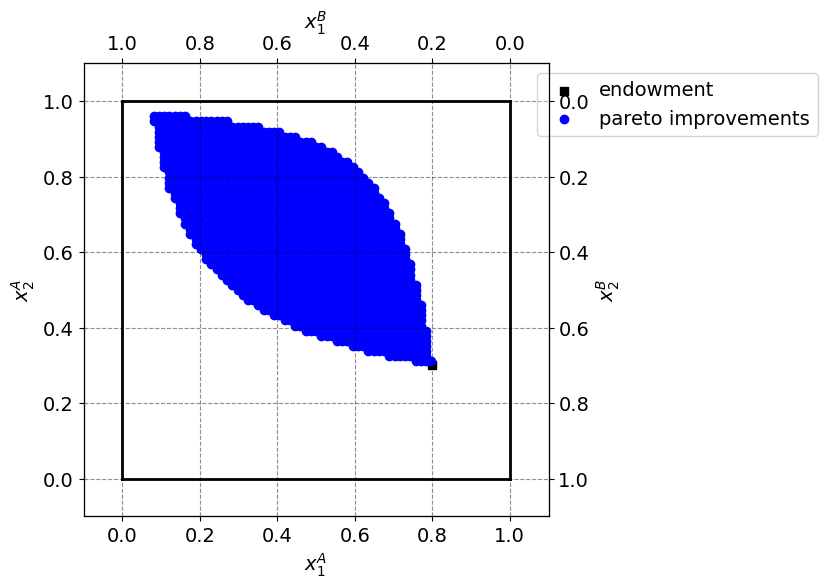

In [6]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

par = market.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')


x1, x2 = zip(*kombinationer)
ax_A.scatter(x1,x2,marker='o',color='blue',label='pareto improvements')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

In [7]:
N = 149
intervallst = [0.5]
i = 1
if intervallst: 
    while intervallst[-1] < 2.5: 
        intervallst.append(0.5+2*i/N)
        i = i+1
print((intervallst))
N= 150


[0.5, 0.5134228187919463, 0.5268456375838926, 0.5402684563758389, 0.5536912751677853, 0.5671140939597316, 0.5805369127516778, 0.5939597315436241, 0.6073825503355704, 0.6208053691275168, 0.6342281879194631, 0.6476510067114094, 0.6610738255033557, 0.674496644295302, 0.6879194630872483, 0.7013422818791946, 0.714765100671141, 0.7281879194630873, 0.7416107382550335, 0.7550335570469799, 0.7684563758389262, 0.7818791946308725, 0.7953020134228188, 0.8087248322147651, 0.8221476510067114, 0.8355704697986577, 0.848993288590604, 0.8624161073825503, 0.8758389261744967, 0.889261744966443, 0.9026845637583892, 0.9161073825503356, 0.9295302013422819, 0.9429530201342282, 0.9563758389261745, 0.9697986577181208, 0.9832214765100671, 0.9966442953020134, 1.0100671140939599, 1.023489932885906, 1.0369127516778525, 1.0503355704697985, 1.063758389261745, 1.0771812080536913, 1.0906040268456376, 1.104026845637584, 1.1174496644295302, 1.1308724832214765, 1.1442953020134228, 1.1577181208053693, 1.1711409395973154, 1

In [8]:
alfa = 1/3
beta = 2/3
w1a = 0.8
w2a = 0.3

#OPGAVE 2

def x1b(beta,p_1,p_2,wb_1,wb_2):
    return(beta*((p_1*wb_1+p_2*wb_2)/p_1))

def x2a(beta,p_1,p_2,wb_1,wb_2):
    return((1-beta)*((p_2*wb_2+p_1*wb_1)/p_2))


tal = ExchangeEconomyClass()


eps1 = []
eps2 = []
for i in range(len(intervallst)):
    xa_1, xa_2 = tal.demand_A(intervallst[i])
    xb_1, xb_2 = tal.demand_B(intervallst[i])
    eps1.append(xa_1-w1a+xb_1-(1-w1a))
    eps2.append(xa_2-w2a+xb_2-(1-w2a))
    
print(eps1)

print(eps2)


[0.533333333333333, 0.5037037037037033, 0.47558386411889597, 0.44886128364389233, 0.4234343434343433, 0.3992110453648914, 0.37610789980732173, 0.35404896421845566, 0.3329650092081031, 0.3127927927927926, 0.29347442680776, 0.27495682210708106, 0.2571912013536377, 0.2401326699834161, 0.2237398373983739, 0.20797448165869215, 0.19280125195618136, 0.17818740399385546, 0.16410256410256407, 0.15051851851851838, 0.13740902474526911, 0.12474964234620867, 0.11251758087201114, 0.1006915629322267, 0.089251700680272, 0.07817938420348058, 0.06745718050065863, 0.05706874189364458, 0.04699872286079171, 0.03723270440251569, 0.02775712515489459, 0.018559218559218438, 0.009626955475330823, 0.0009489916963223988, -0.007485380116959095, -0.015686274509804032, -0.02366325369738348, -0.03142536475869817, -0.038981173864894914, -0.04633879781420763, -0.05350593311758378, -0.060489882854100174, -0.06729758149316523, -0.07393561786085157, -0.08041025641025656, -0.08672745694022294, -0.09289289289289293, -0.0989

In [9]:
#OPGAVE 3
clear = []
def marketclear(w1a,w2a,intervallst):
    val = 0.01
    for i in range(len(intervallst)):
        xa_1, xa_2 = tal.demand_A(intervallst[i])
        xb_1, xb_2 = tal.demand_B(intervallst[i])
        if xa_1+xb_1 > w1a+(1-w1a)-val and xa_1+xb_1 < w1a+(1-w1a)+val: 
            print("1",i,xa_1,xb_1,xa_1+xb_1,intervallst[i])
        if xa_2+xb_2 > w2a+(1-w2a)-val and xa_2+xb_2 < w2a+(1-w2a)+val: 
            print("2", i,xa_2,xb_2,xa_2+xb_2,intervallst[i])
print(marketclear(w1a,w2a,intervallst))

1 32 0.37424789410348974 0.6353790613718411 1.0096269554753308 0.9295302013422819
2 32 0.6957494407158837 0.2953020134228188 0.9910514541387025 0.9295302013422819
1 33 0.37271648873072355 0.6282325029655988 1.0009489916963223 0.9429530201342282
2 33 0.7029082774049218 0.29619686800894857 0.9991051454138704 0.9429530201342282
1 34 0.3712280701754386 0.6212865497076023 0.9925146198830409 0.9563758389261745
2 34 0.7100671140939598 0.2970917225950783 1.007158836689038 0.9563758389261745
None


In [13]:
#OPGAVE 6

def utilitarianSocialPlanner(kombinationer): 
    maxval = 0
    for i in range(len(kombinationer)): 
        utilA = tal.utility_A(kombinationer[i][0],kombinationer[i][1])
        utilB = tal.utility_B(1-kombinationer[i][0],1-kombinationer[i][1])
        if utilA+utilB > maxval: 
            maxval = utilA+utilB
    return(maxval)
print(utilitarianSocialPlanner(kombinationer))

    

1.0582427671424415


In [16]:
#OPGAVE 7
import random
def W():
    wList = []
    for i in range(50): 
        w_a = random.randint(0,1)
        w_b = random.randint(0,1)
        wList.append((w_a,w_b))
    return(wList)

print(W())

[(1, 1), (0, 1), (1, 1), (1, 1), (0, 0), (1, 0), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (0, 1), (0, 0), (1, 1), (0, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (0, 1), (0, 1), (0, 1), (0, 0), (1, 0), (1, 0), (0, 1), (0, 0), (1, 0), (1, 1), (1, 0), (1, 0), (0, 1), (1, 1), (1, 0), (0, 0), (1, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 0), (0, 0), (0, 1), (0, 0)]


In [26]:
import random

def W_float():
    wList = []
    for i in range(50):
        w_a = random.uniform(0, 1)
        w_b = random.uniform(0, 1)
        wList.append((w_a, w_b))
    return wList
wlist = W_float()
print((wlist[0]))

(0.41818809094627607, 0.8237709873392035)


In [39]:
uA_bar = market.utility_A(market.par.w1A, market.par.w2A)
uB_bar = market.utility_B(market.par.w1B, market.par.w2B)
def counttupples(wlist,uA_bar,uB_bar): 
    finallst = []
    for i in range(len(wlist)):
        x1a = wlist[i][0]
        x2a = wlist[i][1]
        uA = market.utility_A(x1a, x2a)
        x1b = 1 - x1a
        x2b = 1 - x2a
        uB = market.utility_B(x1b, x2b)
        if uA >= uA_bar and uB >= uB_bar:
            finallst.append((x1a, x2a))
    return(finallst)
belongToC = (counttupples(wlist,uA_bar,uB_bar))
print(len(belongToC))



15


In [57]:
def clearC(w1a,w2a,intervallst):
    val = 0.01
    bestval = [2,0,0]
    for i in range(len(intervallst)):
        xa_1, xa_2 = tal.demand_A(intervallst[i])
        xb_1, xb_2 = tal.demand_B(intervallst[i])
        if xa_1+xb_1 > w1a+(1-w1a)-val and xa_1+xb_1 < w1a+(1-w1a)+val: 
            if abs(xa_1+xb_1-1) < abs(bestval[0]-1): 
                bestval = [xa_1+xb_1,xa_1,xb_1]
        if xa_2+xb_2 > w2a+(1-w2a)-val and xa_2+xb_2 < w2a+(1-w2a)+val: 
            if abs(xa_1+xb_1-1) < abs(bestval[0]-1): 
                bestval = [xa_1+xb_1,xa_1,xb_1]
    return(bestval[1:])


def marketEQ(belongToC,intervallst): 
    marketList = []
    for i in range(len(belongToC)): 
        print(belongToC[i])
        marketList.append(clearC(belongToC[i][0],belongToC[i][1],intervallst))
    return(marketList)
print(marketEQ(belongToC,intervallst))



(0.41818809094627607, 0.8237709873392035)
(0.3005033055001036, 0.6831235855264468)
(0.3836773476609391, 0.6695934540106417)
(0.19333536091160963, 0.6568717706563248)
(0.5484188378376308, 0.8139585236314654)
(0.6712270185520819, 0.44481873895170754)
(0.5074283295301566, 0.7080953565692621)
(0.3679097560067379, 0.7804634664039346)
(0.5978401657829513, 0.5810696706761974)
(0.3784639276582751, 0.45503826928220603)
(0.41168359424738954, 0.8969663681915009)
(0.1588371616797708, 0.7224577297486742)
(0.17468082143983388, 0.7194031131106824)
(0.6473503453808418, 0.44418066174430193)
(0.26100000029034987, 0.6278767340669968)
[[0.37271648873072355, 0.6282325029655988], [0.37271648873072355, 0.6282325029655988], [0.37271648873072355, 0.6282325029655988], [0.37271648873072355, 0.6282325029655988], [0.37271648873072355, 0.6282325029655988], [0.37271648873072355, 0.6282325029655988], [0.37271648873072355, 0.6282325029655988], [0.37271648873072355, 0.6282325029655988], [0.37271648873072355, 0.62823250